In [1]:
import pandas as pd
df = pd.read_excel("corct_sub.xlsx")

In [2]:
df

,comment,label,vader_polarity,blob_polarity,gru_nsr,gru_nsmc
0,정신과에서 처방해주는 식욕억제제 위험,0,0.25305,0.500000,0.198533,0.443011
1,여기서는 못 잡은 남자 경찰 욕은 없네 여자 경찰이 못 잡으면 여경 없애라 이년 저...,0,0.35200,0.500000,0.136027,0.186490
2,비번을 알려달라고 하는건 이해가 안되네요,0,0.50000,0.500000,0.005302,0.282215
3,그냥 아픈애네 그냥 격리 시킵시다,0,0.18755,0.142857,0.019450,0.468670
4,진짜 저런어른은 되지말자,0,0.36225,0.500000,0.062436,0.028310
...,...,...,...,...,...,...
19917,아이고 훈훈한 뉴스에 소름 돋을 정도로 기분이 좋아지네요 모두에게 박수,1,0.91580,0.675000,0.958816,0.987934
19918,시민이 훌 륭하시네요 짱 표창장이라도 드려야,1,0.81245,0.900000,0.837648,0.541795
19919,너무 멋있다 감동이다,1,0.85730,0.837500,0.767420,0.962817
19920,와 잼있었겠다,1,0.89820,0.600000,0.769931,0.849745


In [3]:
df["label"].value_counts()

1    9989
0    9933
Name: label, dtype: int64

In [4]:
from pycaret.classification import *

In [5]:
exp = setup(data = df,
            target = 'label')

,Description,Value
0,Session id,2785
1,Target,label
2,Target type,Binary
3,Original data shape,"(19922, 6)"
4,Transformed data shape,"(19922, 6)"
5,Transformed train set shape,"(13945, 6)"
6,Transformed test set shape,"(5977, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1260
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6970
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3420
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3380
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3430
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4700
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3490
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4930
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3700
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2785, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model_lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

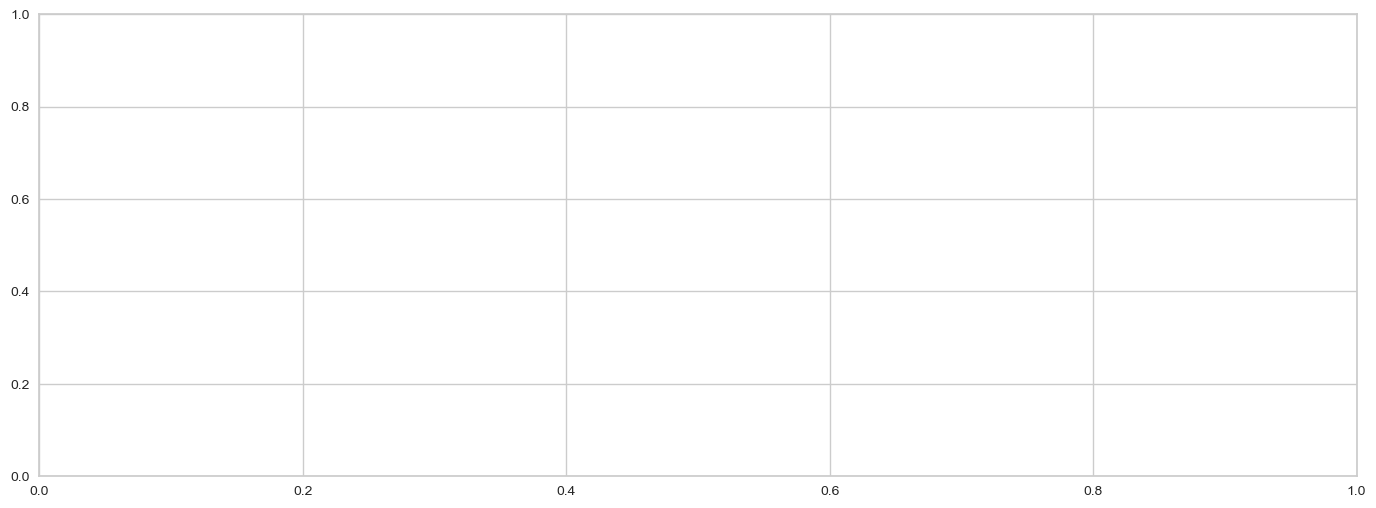

In [9]:
#tuned_lr =  tune_model(model_lr, optimize = 'accuracy')
evaluate_model(model_lr)

In [10]:
df_unseen = pd.read_excel("test_unseen.xlsx")

In [11]:
df_unseen

,comment,label,vader_polarity,blob_polarity,gru_nsr,gru_nsmc
0,경찰인력 엄청 는걸로 알고 있는데 인력이 부족 하다는게 무슨말 인가요 저렇게 신고 ...,0,0.27515,0.343750,0.006739,0.145203
1,저 부주의한 적재 답도 없이 한심하군 대체 왜 저러구 싣고 다니는 거냐 시민들 넘 멋지다,0,0.41000,0.308333,0.004683,0.104157
2,사실 장리간 비행기에서 애기가 울면 진짜 힘들수있다고 보는데 나름 노이즈캔슬링 헤드...,0,0.24090,0.250000,0.126733,0.109724
3,저기 안치우면 내차가 못가니까,0,0.50000,0.500000,0.126498,0.279440
4,그작자는 칼퇴,0,0.50000,0.500000,0.399006,0.318083
...,...,...,...,...,...,...
39995,너무 대견하고 멋있어요 정말 차도 잃고 큰일날 뻔 했는데 저거 범인 잡아야해요,1,0.57965,0.658333,0.578047,0.576537
39996,응급실 진료 순서 원칙이 있던데 그런 공익광고 많이 했으면 좋겠어요 저도 보건 배우...,1,0.92500,0.625000,0.597062,0.926595
39997,네 제말이 저경찰관 보너스좀 두둑히 채워줘서 휴가좀 보내줘라 특별휴가는 저런분을 위...,1,0.94300,0.511161,0.565435,0.880713
39998,시벌 세상 같아서는 디지도록두지 그래도 살만한가,1,0.76335,0.650000,0.879135,0.933833


In [12]:
pred_unseen = predict_model(model_lr, 
                            data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9998,0.9998,0.9995,0.9999,0.9997,0.9996,0.9996


In [13]:
pred_unseen

,comment,vader_polarity,blob_polarity,gru_nsr,gru_nsmc,label,prediction_label,prediction_score
0,경찰인력 엄청 는걸로 알고 있는데 인력이 부족 하다는게 무슨말 인가요 저렇게 신고 ...,0.27515,0.343750,0.006739,0.145203,0,0,1.0000
1,저 부주의한 적재 답도 없이 한심하군 대체 왜 저러구 싣고 다니는 거냐 시민들 넘 멋지다,0.41000,0.308333,0.004683,0.104157,0,0,0.9999
2,사실 장리간 비행기에서 애기가 울면 진짜 힘들수있다고 보는데 나름 노이즈캔슬링 헤드...,0.24090,0.250000,0.126733,0.109724,0,0,1.0000
3,저기 안치우면 내차가 못가니까,0.50000,0.500000,0.126498,0.279440,0,0,0.9970
4,그작자는 칼퇴,0.50000,0.500000,0.399006,0.318083,0,0,0.9602
...,...,...,...,...,...,...,...,...
39995,너무 대견하고 멋있어요 정말 차도 잃고 큰일날 뻔 했는데 저거 범인 잡아야해요,0.57965,0.658333,0.578047,0.576537,1,1,0.8447
39996,응급실 진료 순서 원칙이 있던데 그런 공익광고 많이 했으면 좋겠어요 저도 보건 배우...,0.92500,0.625000,0.597062,0.926595,1,1,0.9989
39997,네 제말이 저경찰관 보너스좀 두둑히 채워줘서 휴가좀 보내줘라 특별휴가는 저런분을 위...,0.94300,0.511161,0.565435,0.880713,1,1,0.9968
39998,시벌 세상 같아서는 디지도록두지 그래도 살만한가,0.76335,0.650000,0.879135,0.933833,1,1,0.9998


In [14]:
from pycaret.utils import check_metric
check_metric(pred_unseen['prediction_label'], pred_unseen['label'], metric = 'Accuracy')

ImportError: cannot import name 'check_metric' from 'pycaret.utils' (C:\Users\hwwe1\anaconda3\lib\site-packages\pycaret\utils\__init__.py)

In [15]:
df_all = pd.read_excel("C:\\Users\\hwwe1\\Desktop\\ytb_tm_files\\project_mj\\train\\vader & blob\\intergrated_scores3.xlsx")

In [17]:
df_all

,comment,vader_polarity,blob_polarity,gru_nsr,gru_nsmc,binary_nsr_past,binary_nsr,binary_nsmc,category_vader,category_blob
0,와 저양반 전생에 나라구했노 타이밍보소,0.88250,0.483333,0.094862,0.898618,0,0,1,1,0
1,운 좋네 진짜 의대생도 아니고 레지던트나 전문의도 아닌 교수,0.61315,0.583333,0.058930,0.338460,0,0,0,1,1
2,도와주신 다른분들도 정말 대단하십니다,0.82950,0.668750,0.188427,0.910659,0,0,1,1,1
3,아직은 살만한 세상인거같네요,0.76335,0.650000,0.487963,0.619475,0,0,1,1,1
4,살 사람은 저렇게 천운이 있어서 살어,0.72940,0.545455,0.202452,0.900313,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
231538,극한직업 취제진 힘내세요,0.75530,0.437500,0.802741,0.713365,1,1,1,1,0
231539,어뢰 연습표적으로 딱이다,0.78595,1.000000,0.941706,0.893476,1,1,1,1,1
231540,교도소 죄수들은 무상으로 최고의 식단으로 국민 세금으로 잘 먹여주는 마당에 군인들 ...,0.62500,0.850000,0.959045,0.155544,1,0,0,1,1
231541,너 먹고살자고 다른 사람 죽이겠다고,0.15460,0.437500,0.566192,0.488498,1,1,0,0,0


In [18]:
pred = predict_model(model_lr, 
                            data = df_all)

In [ ]:
pred.columns

In [ ]:
pr = pred[["comment", "prediction_label", 'binary_nsr_past', 'binary_nsr', 'binary_nsmc', 'category_vader',
       'category_blob']]

pr

In [ ]:
pr.to_excel("C:\\Users\\hwwe1\\Desktop\\ytb_tm_files\\project_mj\\train\\vader & blob\\pr.xlsx")

In [19]:
predict_model(model_lr, data = df_all)

,comment,vader_polarity,blob_polarity,gru_nsr,gru_nsmc,binary_nsr_past,binary_nsr,binary_nsmc,category_vader,category_blob,prediction_label,prediction_score
0,와 저양반 전생에 나라구했노 타이밍보소,0.88250,0.483333,0.094862,0.898618,0,0,1,1,0,1,0.7990
1,운 좋네 진짜 의대생도 아니고 레지던트나 전문의도 아닌 교수,0.61315,0.583333,0.058930,0.338460,0,0,0,1,1,0,0.9917
2,도와주신 다른분들도 정말 대단하십니다,0.82950,0.668750,0.188427,0.910659,0,0,1,1,1,1,0.9420
3,아직은 살만한 세상인거같네요,0.76335,0.650000,0.487963,0.619475,0,0,1,1,1,1,0.9191
4,살 사람은 저렇게 천운이 있어서 살어,0.72940,0.545455,0.202452,0.900313,0,0,1,1,1,1,0.8325
...,...,...,...,...,...,...,...,...,...,...,...,...
231538,극한직업 취제진 힘내세요,0.75530,0.437500,0.802741,0.713365,1,1,1,1,0,1,0.9920
231539,어뢰 연습표적으로 딱이다,0.78595,1.000000,0.941706,0.893476,1,1,1,1,1,1,1.0000
231540,교도소 죄수들은 무상으로 최고의 식단으로 국민 세금으로 잘 먹여주는 마당에 군인들 ...,0.62500,0.850000,0.959045,0.155544,1,0,0,1,1,1,0.9347
231541,너 먹고살자고 다른 사람 죽이겠다고,0.15460,0.437500,0.566192,0.488498,1,1,0,0,0,0,0.9476
